**Name: Krish Murjani | N Number: N10121101 | NetID: km6520**

### **AI CS-GY-6613 Assignment 1A**

# **Simulation of Multivariate Normal Distribution**

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
m = 1000 # samples

# mean & covariances
a_mean = torch.tensor([-0.5, -0.5])  
a_cov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])  

b_mean = torch.tensor([0.5, 0.5])  
b_cov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

In [3]:

# svd
def generate_bivariate_samples(mean, cov, num_samples):
    u, s, v = torch.svd(cov)
    
    z = torch.randn(num_samples, 2)
    
    # (u @ sqrt(s) @ z^t + mean)
    s_sqrt = torch.sqrt(s)
    x = (u @ torch.diag(s_sqrt) @ z.T).T + mean
    return x

In [4]:
# samples from bivariate
# a_bivariate = torch.distributions.MultivariateNormal(a_mean, a_cov)
# a_samples = a_bivariate.sample((m,))

# b_bivariate = torch.distributions.MultivariateNormal(b_mean, b_cov)
# b_samples = b_bivariate.sample((m,))

a_samples = generate_bivariate_samples(a_mean,a_cov,m)
b_samples = generate_bivariate_samples(b_mean,b_cov,m)

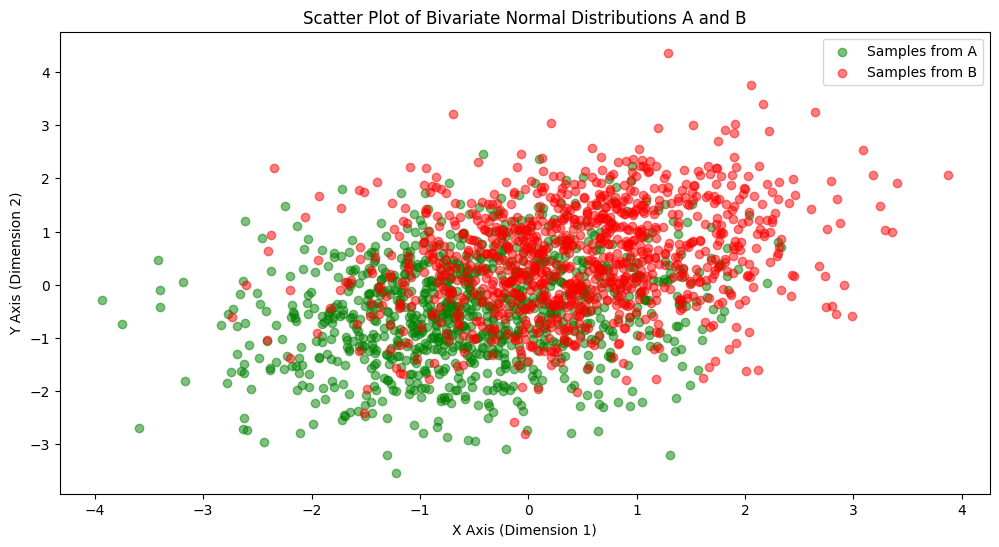

In [5]:
#plotting
plt.figure(figsize=(12, 6))
plt.scatter(a_samples[:, 0].numpy(), a_samples[:, 1].numpy(), c='green', alpha=0.5, label='Samples from A')
plt.scatter(b_samples[:, 0].numpy(), b_samples[:, 1].numpy(), c='red', alpha=0.5, label='Samples from B')
plt.title('Scatter Plot of Bivariate Normal Distributions A and B')
plt.xlabel('X Axis (Dimension 1)')
plt.ylabel('Y Axis (Dimension 2)')
plt.legend()
plt.show()

In [6]:
# stacking into single tensor
combined_samples = torch.cat((a_samples, b_samples), dim=0)
print(f"Total combined data shape: {combined_samples.shape}")

Total combined data shape: torch.Size([2000, 2])


# **K-Means Clustering**

In [7]:
# standarddizing data from previous 
def standardize_data(data):
    min_vals = data.min(dim=0)[0]
    max_vals = data.max(dim=0)[0]
    scaled_data = (data - min_vals) / (max_vals - min_vals) * 10 + 1
    return scaled_data

scaled_samples = standardize_data(combined_samples)

In [8]:
def initialize_centroids(data, k):
    indices = torch.randperm(data.size(0))[:k]
    centroids = data[indices]
    return centroids

# calculating distances 
def assign_labels(data, centroids):
    distances = torch.cdist(data, centroids)  # pairwise distances
    labels = torch.argmin(distances, dim=1)  # assign labels
    return labels

def update_centroids(data, labels, k):
    new_centroids = torch.stack([data[labels == i].mean(dim=0) for i in range(k)])
    return new_centroids

In [9]:
# k-means, parameters
k = 2  # clusters
max_iterations = 100
centroids = initialize_centroids(scaled_samples, k)

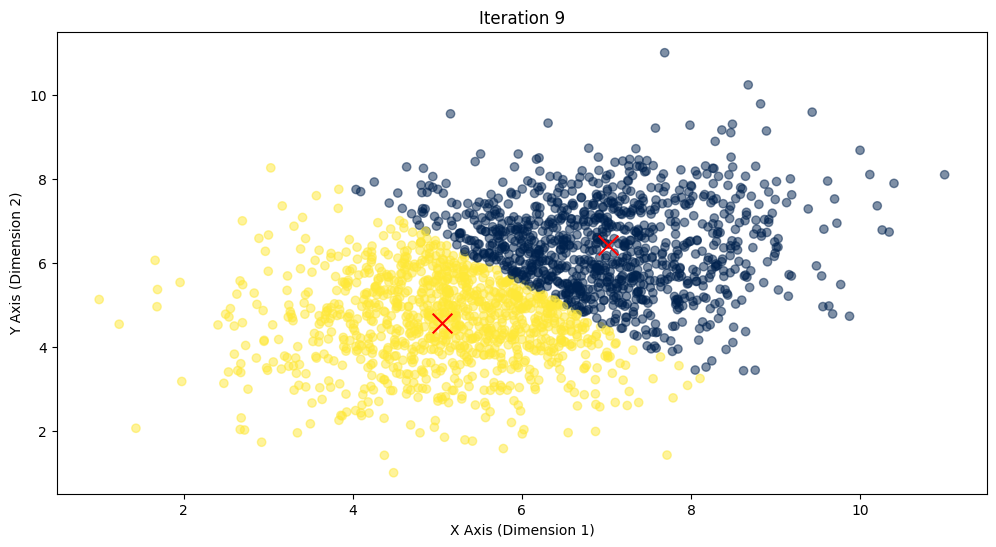

Converged after 12 iterations


In [10]:
for iteration in range(max_iterations):
    old_centroids = centroids.clone()
    labels = assign_labels(scaled_samples, centroids)
    centroids = update_centroids(scaled_samples, labels, k)
    
    # plot every 10 iterations
    if (iteration + 1) % 10 == 0:
            plt.figure(figsize=(12, 6))
            plt.scatter(scaled_samples[:, 0], scaled_samples[:, 1], c=labels, alpha=0.5, cmap='cividis')
            plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')
            plt.title(f'Iteration {iteration}')
            plt.xlabel('X Axis (Dimension 1)')
            plt.ylabel('Y Axis (Dimension 2)')
            plt.show()
    
    # convergencee
    if torch.allclose(centroids, old_centroids, atol=1e-4):
        print(f'Converged after {iteration + 1} iterations')
        break

In [11]:
print("Final Centroids:\n", centroids)
print("Label Counts:\n", torch.bincount(labels))

Final Centroids:
 tensor([[7.0144, 6.4243],
        [5.0558, 4.5680]])
Label Counts:
 tensor([ 992, 1008])


# **Principal Component Analysis**

In [12]:
# generating synthesized data
X = torch.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + torch.normal(0, 0.1, (100,))
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + torch.normal(0, 0.1, (100,))

X = X - torch.mean(X, dim=0)

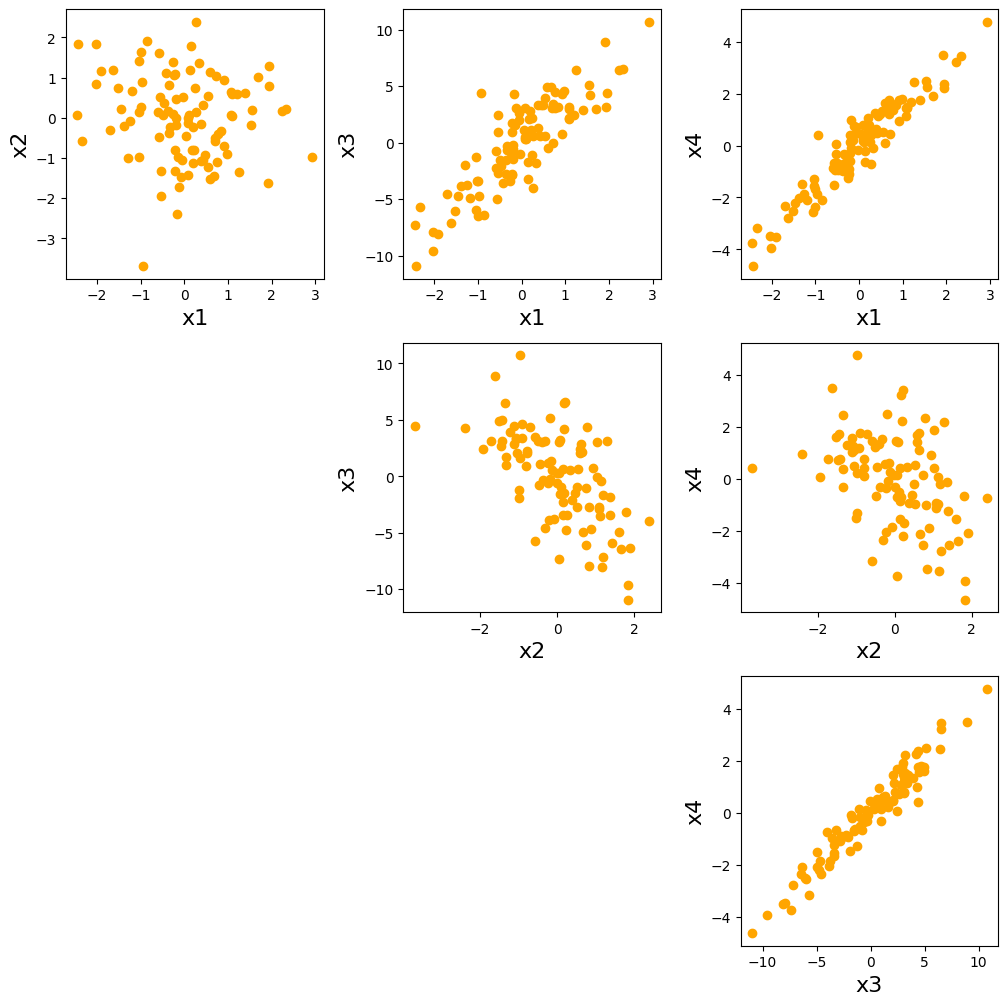

In [13]:
# plotting
plt.figure(figsize=(13, 13))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i * 4 + j + 1)
            plt.scatter(X[:, i], X[:, j], c='orange')
            plt.xlabel(f'x{i+1}', fontsize=16)
            plt.ylabel(f'x{j+1}', fontsize=16)
plt.tight_layout()

In [14]:
# pca

# 1 calculate covariance matrix
cov_matrix = torch.mm(X.T, X) / (X.size(0) - 1)

# 2 eigen decomposition
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# 3 sorting eiigenvectors in desc order
sorted_indices = torch.argsort(eigenvalues, descending=True)
principal_comps = eigenvectors[:, sorted_indices]

for i, component in enumerate(principal_comps.T):
    print(f'Principal Component {i+1}')
    print(component)
    print()

Principal Component 1
tensor([-0.2049,  0.1394, -0.8937, -0.3741])

Principal Component 2
tensor([ 0.4870,  0.7972, -0.1270,  0.3335])

Principal Component 3
tensor([-0.2148, -0.2865, -0.3567,  0.8629])

Principal Component 4
tensor([ 0.8214, -0.5129, -0.2409, -0.0654])

